In [5]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
def load():
  data = pd.read_csv("/content/sample_data/california_housing_train.csv")
  return data

In [11]:
df = load()
df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [12]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
scaler_minmax = MinMaxScaler()
scaler_zscore = StandardScaler()
scaler_robust = RobustScaler()

In [15]:
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df),columns=df.columns)
df_zscore = pd.DataFrame(scaler_zscore.fit_transform(df),columns=df.columns)
df_robust = pd.DataFrame(scaler_robust.fit_transform(df), columns=df.columns)
df_log = np.log(df - df.min() + 1)

In [16]:
corr_original = df.corr()
corr_log = df_log.corr()

In [17]:
corr_original

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


In [18]:
corr_log

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.888333,-0.096266,0.028622,0.059437,0.113920,0.057059,-0.007902,-0.010943
latitude,-0.888333,1.000000,0.030375,-0.034339,-0.069563,-0.126489,-0.086665,-0.065283,-0.160618
housing_median_age,-0.096266,0.030375,1.000000,-0.305432,-0.261785,-0.224711,-0.230165,-0.149999,0.040783
total_rooms,0.028622,-0.034339,-0.305432,1.000000,0.944785,0.866481,0.930318,0.251572,0.188579
total_bedrooms,0.059437,-0.069563,-0.261785,0.944785,1.000000,0.899419,0.973941,0.011910,0.091244
population,0.113920,-0.126489,-0.224711,0.866481,0.899419,1.000000,0.935141,0.029794,0.037425
households,0.057059,-0.086665,-0.230165,0.930318,0.973941,0.935141,1.000000,0.046050,0.119531
median_income,-0.007902,-0.065283,-0.149999,0.251572,0.011910,0.029794,0.046050,1.000000,0.660156
median_house_value,-0.010943,-0.160618,0.040783,0.188579,0.091244,0.037425,0.119531,0.660156,1.000000


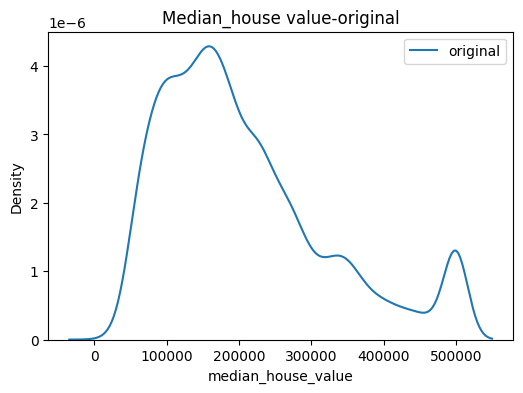

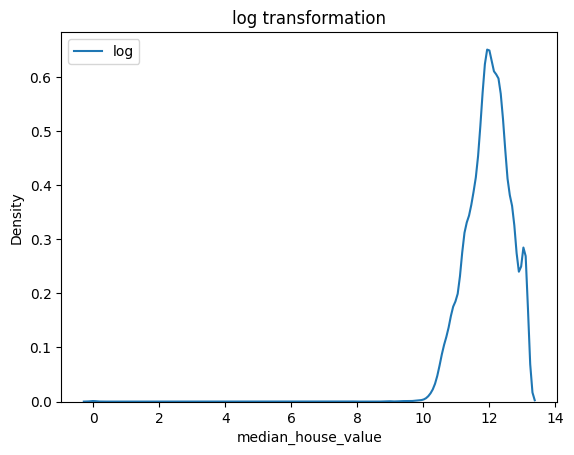

In [22]:
#Distribution difference for median_house_value
plt.figure(figsize=(6,4))
sns.kdeplot(df["median_house_value"], label="original")
plt.title("Median_house value-original")
plt.legend()
plt.show()
sns.kdeplot(df_log["median_house_value"], label="log")
plt.title("log transformation")
plt.legend()
plt.show()